In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import sympy as sp
import math

# 4.1) iid Processes (not sure about discussion part)
Make a program that can stem plot N samples of a realization of the standard discrete time Gaussian i.i.d. process

$$
\{X_k\} \overset{iid}{=} N(0,1)
$$

and from the uniform i.i.d. process

$$
\{Y_k\} \overset{iid}{=} U(0,1)
$$

Now, simulate an exponential i.i.d. process $\{Z_k\}$ by transforming $\{Y_k\}$ (read Kay section 10.9 if you don't know how to do this).

Discuss differences and similarities between the realizations of $\{X_k\}$, $\{Y_k\}$, and $\{Z_k\}$.
Derive and/or write up the mean and variance functions:

$$
\begin{align}
\mu_X(k) = E[X_k] \; \; \; \; \; \sigma_X^2(k) = Var(X_k) \\
\mu_Y(k) = E[Y_k] \; \; \; \; \; \sigma_Y^2(k) = Var(Y_k) \\
\mu_Z(k) = E[Z_k] \; \; \; \; \; \sigma_Z^2(k) = Var(Z_k) \\
\end{align}
$$

Modify your program to draw a large number of such realizations, and then estimate the mean and variance functions.
Compare your estimates to the theoretical values.
How many realizations do you need to get accurate estimates?
Now change you program such that $\mu_X(k) = \mu_Y(k) = a$ and $\sigma_X^2(k) = \sigma_Y^2(k)=b$, where a and b are arbitrary input parameters to your program.

'0.00029729596228386386 - 1.0000671183255236'

'0.4999683755414678 - 0.0832970701576099'

'0.9996652930386439 - 0.9988178666967528'

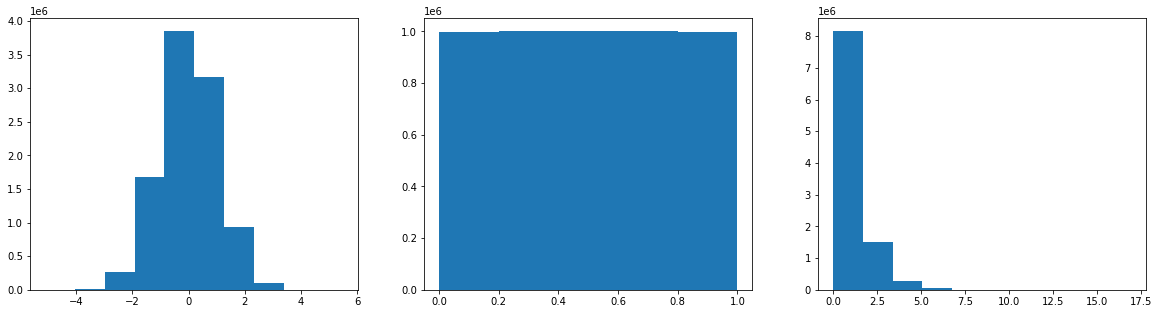

In [2]:
N = 10000000
a, b = 0, 1
meanX = a
stdX = math.sqrt(b)
aY = a
bY = b

# first two realisations
Xk = np.random.normal(meanX, stdX, N)
Yk = np.random.uniform(aY, bY, N)
# our Y_k -> Z_k transformation, look at Kay p. 324
Zk = -np.log(1-Yk)
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
ax1, ax2, ax3 = ax[0], ax[1], ax[2]
ax1.hist(Xk)
ax2.hist(Yk)
ax3.hist(Zk)


# we can see that our Zk is the CDF of our Yk (NOT SURE OF THIS??)
# positive part of a normal distibution (gaussin process)

# get mean/variance
display("{} - {}".format(np.mean(Xk), np.var(Xk)))
display("{} - {}".format(np.mean(Yk), np.var(Yk)))
display("{} - {}".format(np.mean(Zk), np.var(Zk)))

# Around 1000000 I would say?

# done?

# 4.2) Sum of Two Independent Random Variables
In this exercise, we want to find out about the distribution of a random variable
obtained by adding two independent random variables. First, consider the following
variables:

$$
\begin{align}
X_1 \sim N(0, 1) \\
X_2 \sim N(0, 1) \\
Y = X_1 + X_2
\end{align}
$$

Write a script that generates multiple realizations of the variables. Use the obtained
realizations to estimate and plot their pdfs (check footnote). From the obtained results, what seems
to be the distribution of Y ? Does this confirm what you would expect from the
theory?
Next, repeat the same procedure but with the following variables:

$$
\begin{align}
U_1 \sim U(-\sqrt{3}, +\sqrt{3}) \\
U_2 \sim U(-\sqrt{3}, +\sqrt{3}) \\
Z = U_1 + U_2
\end{align}
$$

How does the pdf of the transformed random variable Z look in this case? If you
are surprised by the results, you should review again Section 12.6 in Kay’s book, in
particular Example 12.8 and the generalization that follows.
To finalize, repeat the exercise, only this time adding up two uniform random
variables with different ranges.

Footnote: You can estimate pdfs from realizations of random variables in several ways using MATLAB.
You may use histograms, which provide useful information about the pdf’s shape (try out the
commands histogram and histfit. A slightly more useful tool can be the command ksdensity.
Read the MATLAB documentation about these commands and try them out!

0.0016851723933930575

2.0092698439716963

(array([ 2112.,  5914., 10000., 13858., 17935., 17899., 13884., 10085.,
         6107.,  2206.]),
 array([-3.44709238e+00, -2.75809803e+00, -2.06910367e+00, -1.38010931e+00,
        -6.91114958e-01, -2.12060271e-03,  6.86873753e-01,  1.37586811e+00,
         2.06486246e+00,  2.75385682e+00,  3.44285118e+00]),
 <a list of 10 Patch objects>)

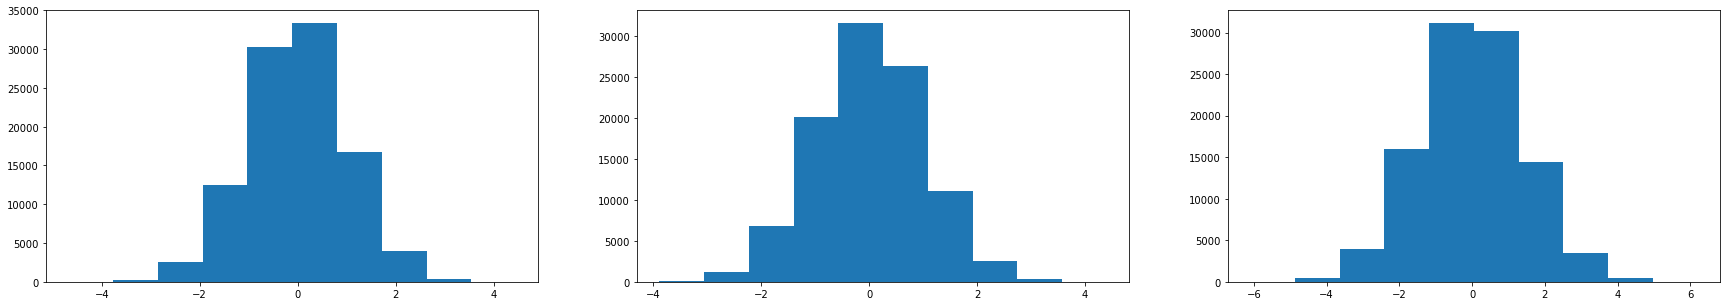

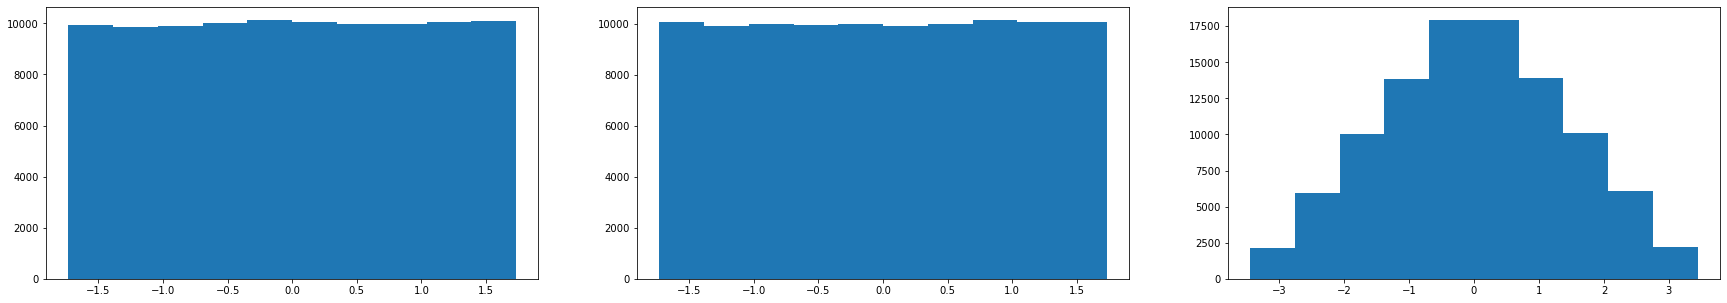

In [3]:
N = 100000
X1 = np.random.normal(0,math.sqrt(1),N)
X2 = np.random.normal(0,math.sqrt(1),N)
Y = X1 + X2

fig, ax = plt.subplots(ncols=3, figsize=(30,5))
ax1, ax2, ax3 = ax[0], ax[1], ax[2]
ax1.hist(X1)
ax2.hist(X2)
ax3.hist(Y)

# yes it does, as we can see that the
# mean of Y is the mean of X1 + X2,
# and variance is variance of X1 + X2
display(np.mean(Y))
display(np.var(Y))

U1 = np.random.uniform(-math.sqrt(3), +math.sqrt(3), N)
U2 = np.random.uniform(-math.sqrt(3), +math.sqrt(3), N)
# U1 = np.random.uniform(0, 1, N)
# U2 = np.random.uniform(0, 1, N)
Z = U1 + U2

fig, ax = plt.subplots(ncols=3, figsize=(30,5))
ax1, ax2, ax3 = ax[0], ax[1], ax[2]
ax1.hist(U1)
ax2.hist(U2)
ax3.hist(Z)

# the book teels us, if the distribution is the same, then we will get a triangle like distribution
# this looks somewhat like a normal distribution

# 4.3) Cosines With Random Phases
Consider the continuous time process

$$
X(t) = cos(t + \Theta), \; \; t \in \mathbb{R}, \; \; \Theta \sim U(-\pi, \pi)
$$

Simulate and plot some realization of $X(t)$.
Since $X(t)$ is a continuous-time process you will need to sample in order to plot it in Matlab.
Compute the mean and variance functions for $X(t)$.
Check your results with Monte Carlo simulations

'-5.32042467771966e-06 mean - 0.5000040727335832 var'

'1.0787981588108111e-05 mean - 0.5000015546837455 var'

'1.8089053059652174e-05 mean - 0.4999955269004752 var'

'-4.49438857569773e-06 mean - 0.5000043045261499 var'

'9.700771321332165e-06 mean - 0.5000021915489254 var'

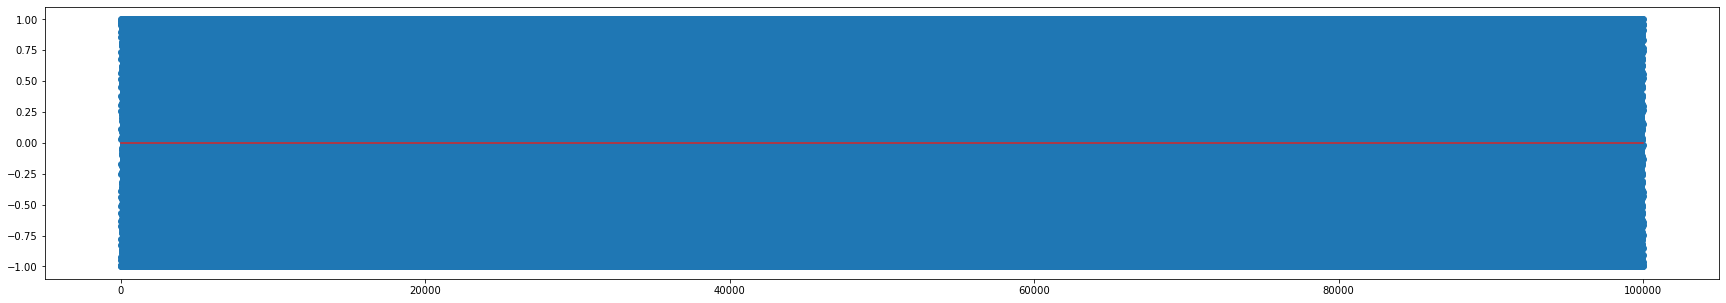

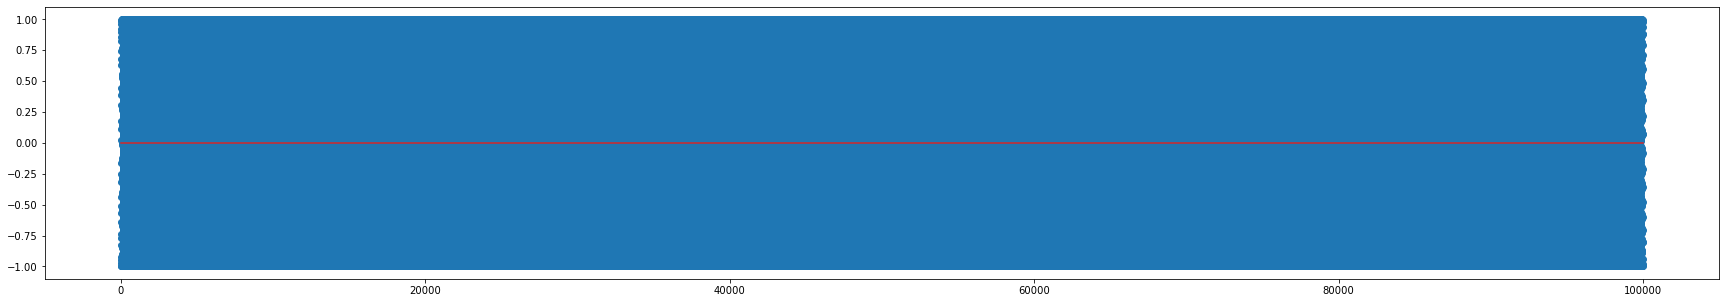

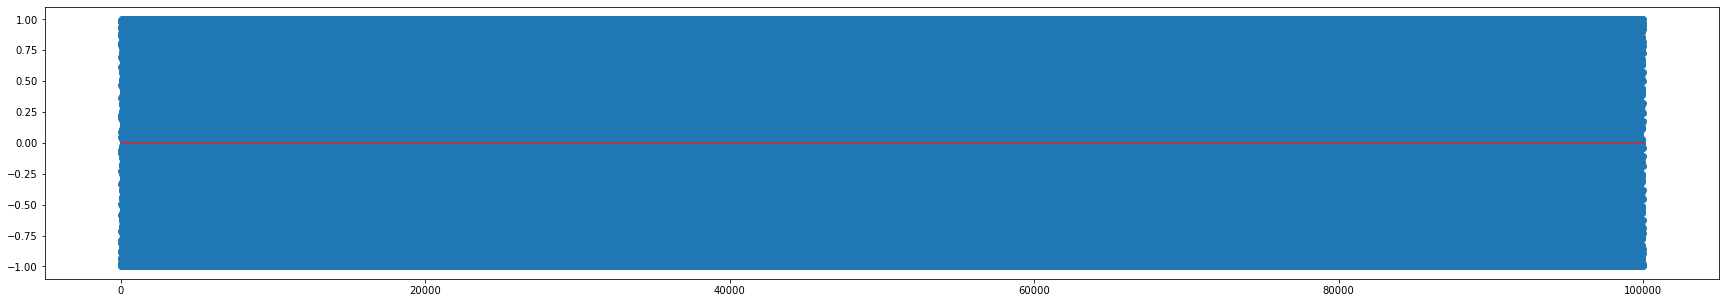

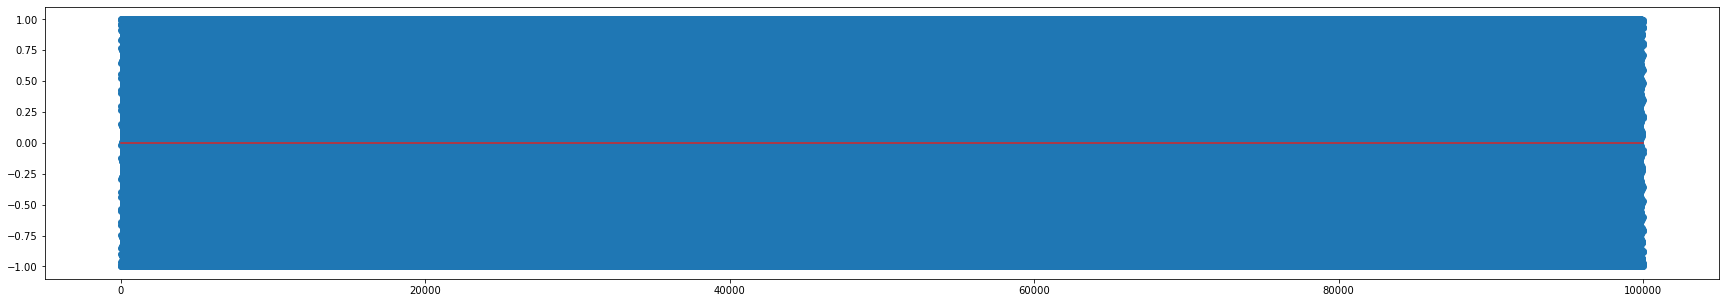

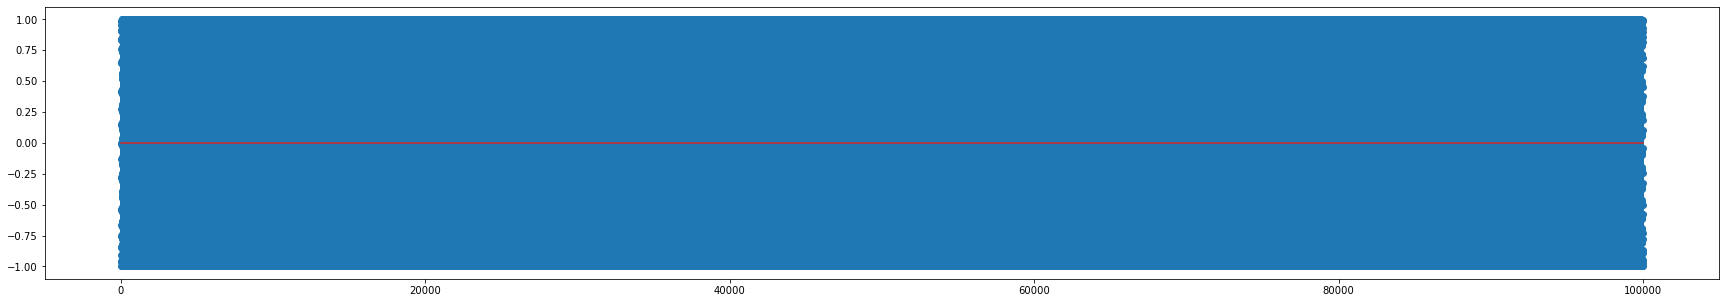

In [4]:
N = 100000

for i in range(5):
    # generate a single theta, to be our phase
    theta = np.random.uniform(-math.pi, math.pi)
    # equally divided spacing, could also be np.arange(N) instead
    x = np.linspace(0, N, N)
    #x = np.arange(N)
    X = np.cos(x+theta)
    #X = x+theta
    
    display("{} mean - {} var".format(np.mean(X), np.var(X)))

    fig, ax = plt.subplots(figsize=(30,5))
    ax.stem(X, use_line_collection=True)

In [5]:
# computing the mean/var like below
x = sp.symbols("x")
c = 1

a = -sp.pi
b = sp.pi

exp = sp.cos(c+x) * (1/(b-a))
mean = sp.integrate(exp, (x,a,b))

        
exp2 = sp.cos(c+x)**2 * (1/(b-a))
var = sp.integrate(exp2, (x,a,b)) - mean

display(mean.evalf(),var.simplify().evalf())

0

0.500000000000000

# 4.4) N-variate Gaussian Random Vectors (not sure???)


In [6]:
h = 0.2
C = np.matrix([
    [1,   h,   h**2],
    [h,   1,   h],
    [h**2,h,   1],
])
x = np.random.normal()
display(C.sum())
display(C)

3.88

matrix([[1.  , 0.2 , 0.04],
        [0.2 , 1.  , 0.2 ],
        [0.04, 0.2 , 1.  ]])

# 4.5) Moving Average (MA(1)) Process

array(2.02305962)

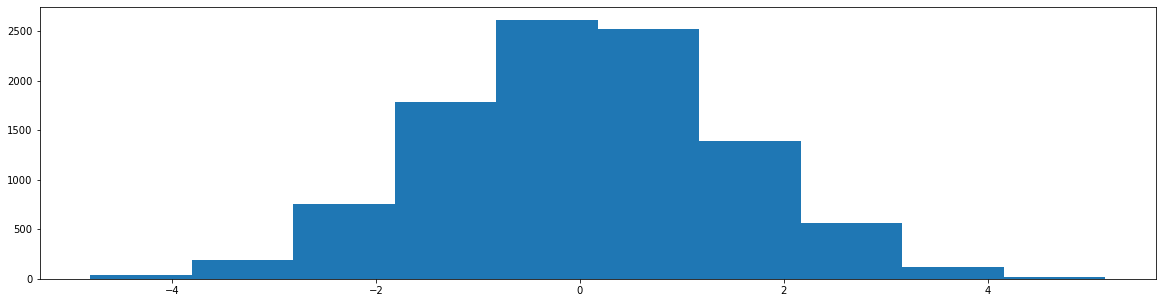

In [7]:
N = 10000

meanX = 0
stdX = math.sqrt(1)
X = np.random.normal(meanX, stdX, N)

# fastest method of doing V = X[n] + X[n+1]
X2 = np.roll(X, 1)
X2[0] = 0
V = X+X2

# easiet method
#V = np.empty(N)
# for n in range(N-1):
#     V[n] = X[n] + X[n+1]

fig, ax = plt.subplots(figsize=(20,5))
ax.hist(V)

np.cov(V)
# As the cov(V) = var(V), this means that it is identically distributed
# For our independent part, we know that X is indepedent, and
# as our V is composed of values in X (V = X[n] + X[n+1]), then
# it is also independent.
# -> IID